Modules

In [43]:
#load modules
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import preprocessing
import tensorflow as tf
import os
from PIL import Image
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

Data Loading

In [26]:
#load train data
train_dataset = []
with open(r"train.csv", 'r') as file:
  csvreader = csv.reader(file)
  for row in csvreader:
    train_dataset.append(row)
#remove the header
train_dataset.pop(0)
    
#load test data
test_dataset = []
with open(r"test.csv", 'r') as file:
  csvreader = csv.reader(file)
  for row in csvreader:
    test_dataset.append(row)
test_dataset.pop(0)
print() #just to make the output look nicer

Data Preparation

In [27]:
#label preparation
train_labels = [i[0] for i in train_dataset]
train_labels = np.array(train_labels)
train_labels = train_labels.astype(int)
# train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)

In [28]:
#input data preparation
train_images = [i[1:] for i in train_dataset]
trainimages = np.reshape(train_images, (-1,28, 28,1))
trainimages = np.array(trainimages)
#test data
testimages = np.reshape(test_dataset, (-1,28, 28))
testimages = np.array(testimages)

In [29]:
#convert chars to ints
trainimages = trainimages.astype(int)
testimages = testimages.astype(int)

In [30]:
#normalize pixel values
trainimages = trainimages/255.
testimages = testimages/255.

In [31]:
#split data into training and validation sets
train_images, val_images, train_labels,val_labels = train_test_split(trainimages, train_labels, test_size=0.2, random_state=42)  

In [32]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))

In [33]:
BATCH_SIZE = 16 # Number of examples used in each iteration
SHUFFLE_BUFFER_SIZE = 100 # Determines random shuffling of examples
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
val_dataset = val_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

In [34]:
def create_model():
    model = tf.keras.Sequential()   
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(10))
    return model

In [35]:
model = create_model()
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])

Epoch 1/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.2901 - sparse_categorical_accuracy: 0.9157 - val_loss: 0.1984 - val_sparse_categorical_accuracy: 0.9412
Epoch 2/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.1399 - sparse_categorical_accuracy: 0.9601 - val_loss: 0.1431 - val_sparse_categorical_accuracy: 0.9595
Epoch 3/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.1032 - sparse_categorical_accuracy: 0.9703 - val_loss: 0.1361 - val_sparse_categorical_accuracy: 0.9629
Epoch 4/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.0825 - sparse_categorical_accuracy: 0.9767 - val_loss: 0.1286 - val_sparse_categorical_accuracy: 0.9665
Epoch 5/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.0691 - sparse_categorical_accuracy: 0.9816 - val_loss: 0.1273 - val_sparse_categorical_accuracy: 0.9665
Epoch 6/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.0603 - spars

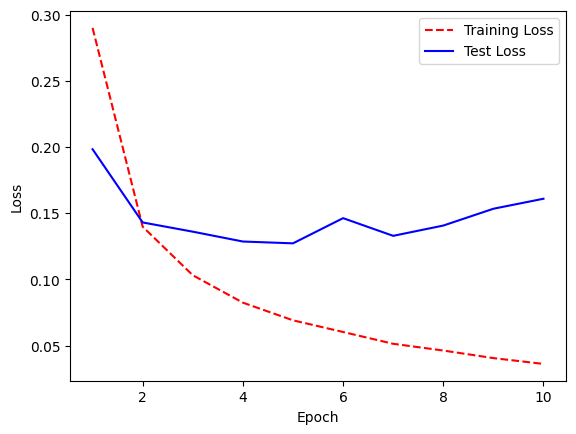

In [36]:
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [56]:
results = model.predict(testimages)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

In [59]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)

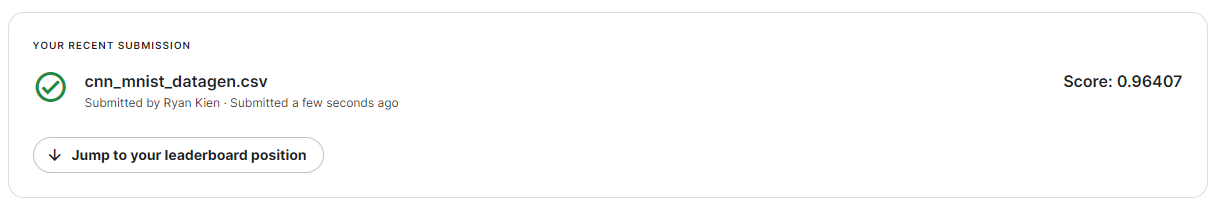